## Задание1. Ёмкостная размерность

In [1]:
import matplotlib.pylab as plt
import numpy as np
import itertools
import math
import cv2
import os

def show_gray(img):
    ax = plt.axes([0,0,2,2], frameon=False)
    ax.set_axis_off()
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()

Выбор изображения

In [2]:
dir_ = 'Brodatz' # Директория (можно полный путь)
filename = '1.tiff' #Имя файла

Размер изображения:  (512, 512)


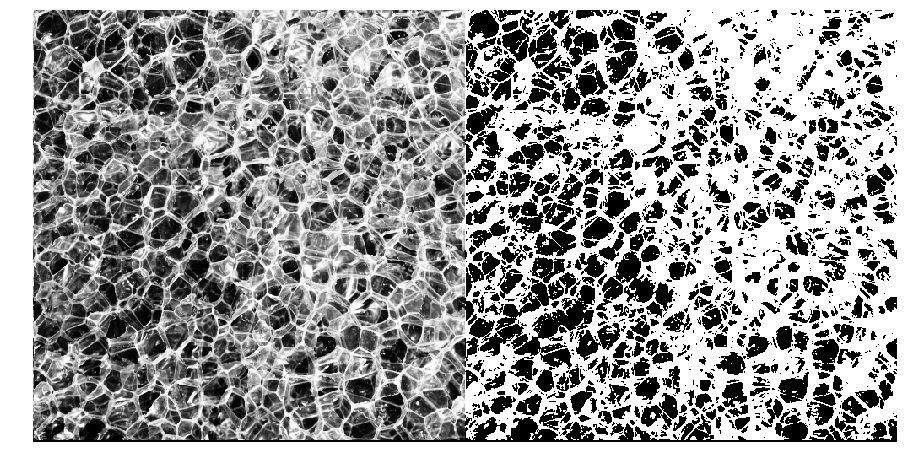

In [3]:
filename = '1.tiff' #Имя файла
image = cv2.imread(os.path.join(dir_, filename), 0)
img = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)[1] #бинаризация
print('Размер изображения: ', img.shape)
show_gray(np.hstack((image, img)))

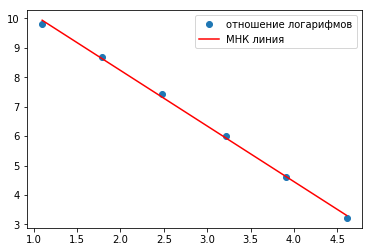

Ёмкостная размерность:  1.89140861943


In [4]:
def LeastSquares(xs, ys):
    A = np.vstack([xs, np.ones(len(xs))]).T
    k, b = np.linalg.lstsq(A, ys)[0]
    plt.plot(xs, ys, 'o', label='отношение логарифмов')
    plt.plot(xs, k*xs + b, 'r', label='МНК линия')
    plt.legend()
    plt.show()
    return k

def capacity_dim(img):
    n, m = img.shape
    xs, ys = [], []
    epss, k = [100], 2 #начальный eps и k
    while epss[-1] > 2*k: #пока размер ячейки больше 2*k, уменьшаем eps в k раз
        epss.append(epss[-1] // k)
    for eps in epss:
        N = 0
        for c1, c2 in itertools.product(range(n // eps), range(m // eps)):
            pos1, pos2 = c1*eps, c2*eps
            if 0 in img[pos1:pos1 + eps, pos2:pos2 + eps]:
                N += 1
        xs.append(math.log(eps))
        ys.append(math.log(N))
    xs, ys = np.array(xs), np.array(ys)
    return -LeastSquares(xs, ys)

print('Ёмкостная размерность: ', capacity_dim(img))

## Задание2. Спектр размерностей Реньи

Выбор изображений

In [5]:
dir_ = 'Silver' # Директория (можно полный путь)
filenames = ['large.jpg', 'small.jpg', 'zero.jpg'] #Имена файлов

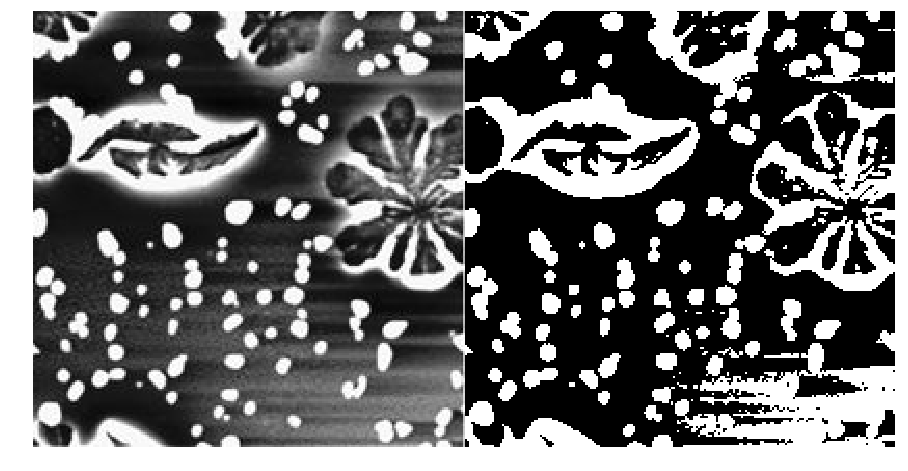

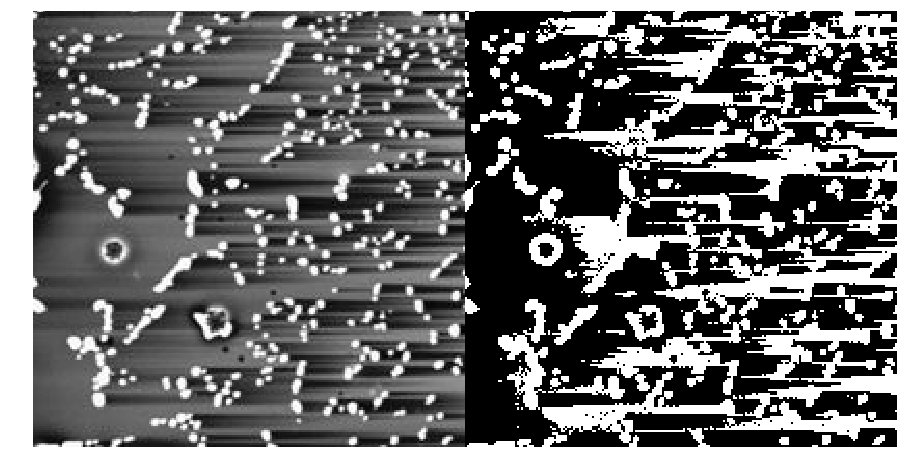

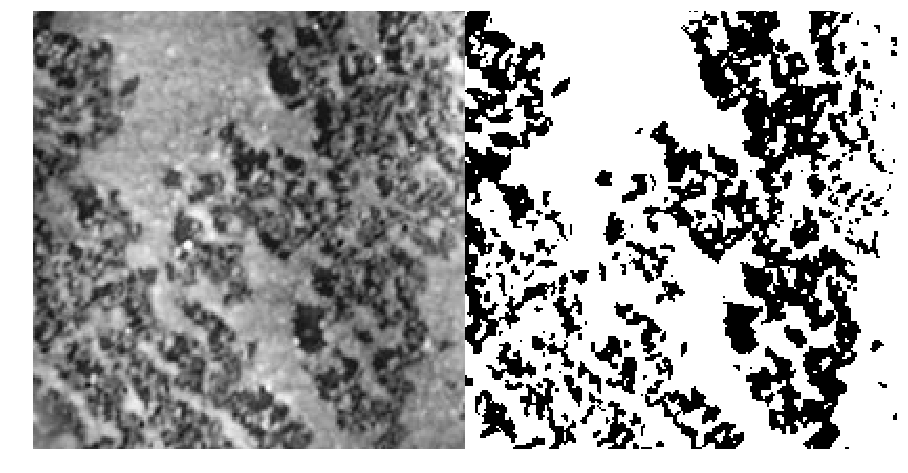

In [6]:
filenames = ['large.jpg', 'small.jpg', 'zero.jpg'] #Имена файлов
imgs = []
for name in filenames:
    image = cv2.imread(os.path.join(dir_, name), 0)
    img = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)[1] #бинаризация
    show_gray(np.hstack((image, img)))
    imgs.append(img)

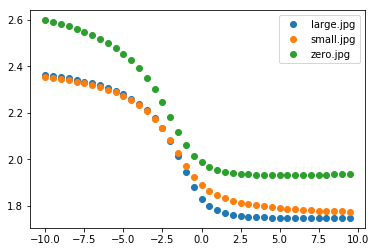

In [7]:
def LeastSquares(xs, ys):
    A = np.vstack([xs, np.ones(len(xs))]).T
    k, b = np.linalg.lstsq(A, ys)[0]
    return k

def renyi_dim(q, img):
    n, m = img.shape
    xs, ys = [], []
    epss, k = [100], 2 #начальный eps и k
    while epss[-1] > 2*k: #пока размер ячейки больше 2*k, уменьшаем eps в k раз
        epss.append(epss[-1] // k)
    for eps in epss:
        ps = []
        for c1, c2 in itertools.product(range(n // eps), range(m // eps)):
            pos1, pos2 = c1*eps, c2*eps
            p = np.count_nonzero(img[pos1:pos1 + eps, pos2:pos2 + eps]==255)
            if p > 0:
                ps.append(p)
        N = sum(ps)
        ps = np.array(ps) / N
        xs.append(math.log(eps))
        if q != 1:
            ys.append(np.log(np.sum(ps ** q)))
        else:
            ys.append(np.sum(np.log(ps) * ps))
    xs, ys = np.array(xs), np.array(ys)
    k = LeastSquares(xs, ys)
    if q != 1:
        return k / (q - 1)
    else:
        return k

def renyi_spectre(qs, img):
    res = []
    for q in qs:
        res.append(renyi_dim(q, img))
    return res    
  
qs = np.arange(-10, 10, 0.5)
colors = ['r', 'g', 'b']
for img, name, color in zip(imgs, filenames, colors):
    plt.plot(qs, renyi_spectre(qs, img), 'o', label=name)
plt.legend()
plt.show()